In [ ]:
!pip install mygene

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
from sklearn.preprocessing import StandardScaler
import networkx as nx
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def gaussian_2D(value, x, y, x0, y0, s=1.0):
    return value * np.exp(-((x - x0)**2  + (y - y0)**2) / (s**2))

def add_gaussian_to_total(params):
    value, x0, y0, sx = params
    return gaussian_2D(value, x, y, x0, y0, sx)

In [ ]:
name_matrix = pd.read_csv('name_MCF7_GSE149428.csv')
name_matrix

,Sample,drug
0,GSM4500995,MCF7 DMSO_0A
1,GSM4500996,MCF7 DMSO_0B
2,GSM4500997,MCF7 DMSO_0C
3,GSM4500998,MCF7 DMSO_3A
4,GSM4500999,MCF7 DMSO_3B
...,...,...
121,GSM4501116,MCF7 MW_12B
122,GSM4501117,MCF7 MW_12C
123,GSM4501118,MCF7 MW_24A
124,GSM4501119,MCF7 MW_24B


In [ ]:
data_matrix = pd.read_csv('MCF7_GSE149428.csv')
data_matrix.set_index('Gene', inplace=True)
data_matrix.columns = name_matrix['drug']
data_matrix.head()

drug,MCF7 DMSO_0A,MCF7 DMSO_0B,MCF7 DMSO_0C,MCF7 DMSO_3A,MCF7 DMSO_3B,MCF7 DMSO_3C,MCF7 DMSO_6A,MCF7 DMSO_6B,MCF7 DMSO_6C,MCF7 DMSO_9A,...,MCF7 MW_6C,MCF7 MW_9A,MCF7 MW_9B,MCF7 MW_9C,MCF7 MW_12A,MCF7 MW_12B,MCF7 MW_12C,MCF7 MW_24A,MCF7 MW_24B,MCF7 MW_24C
Gene,,,,,,,,,,,,,,,,,,,,,
100287102,0.845098,0.845098,0.698970,0.698970,0.698970,0.698970,0.602060,0.778151,0.602060,0.698970,...,0.477121,0.602060,0.602060,0.301030,0.602060,0.602060,0.602060,0.602060,0.698970,0.301030
653635,2.518514,2.571709,2.390935,2.465383,2.359835,2.561101,2.487138,2.515874,2.501059,2.532754,...,2.451786,2.451786,2.439333,2.217484,2.541579,2.442480,2.495544,2.456366,2.485721,2.298853
102466751,0.903090,1.146128,0.903090,1.380211,0.954243,1.301030,1.255273,1.301030,1.230449,1.176091,...,0.301030,0.000000,0.301030,0.000000,0.000000,0.301030,0.000000,0.000000,0.000000,0.000000
100996442,1.732394,1.875061,1.716003,1.792392,1.770852,1.897627,1.806180,1.851258,1.806180,1.863323,...,2.130334,2.130334,2.149219,2.033424,2.225309,2.155336,2.178977,2.143015,2.184691,2.075547
729737,2.580925,2.796574,2.620136,2.690196,2.642465,2.794488,2.667453,2.718502,2.648360,2.727541,...,2.929930,2.831230,2.850033,2.642465,2.870989,2.844477,2.851258,2.645422,2.676694,2.539076


In [ ]:
import mygene
import pandas as pd


# Get the list of Entrez Gene IDs (row names)
entrez_ids = data_matrix.index.astype(str).tolist()

# Initialize mygene
mg = mygene.MyGeneInfo()

# Query MyGene.info to get gene symbols
results = mg.querymany(entrez_ids, scopes='entrezgene', fields='symbol', species='human')

# Convert results to a DataFrame
mapped_df = pd.DataFrame(results)



INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 2100

,Gene,GSM4500995,GSM4500996,GSM4500997,GSM4500998,GSM4500999,GSM4501000,GSM4501001,GSM4501002,GSM4501003,...,GSM4501111,GSM4501112,GSM4501113,GSM4501114,GSM4501115,GSM4501116,GSM4501117,GSM4501118,GSM4501119,GSM4501120
0,100287102,0.845098,0.845098,0.698970,0.698970,0.698970,0.698970,0.602060,0.778151,0.602060,...,0.477121,0.602060,0.602060,0.301030,0.602060,0.602060,0.602060,0.602060,0.698970,0.301030
1,653635,2.518514,2.571709,2.390935,2.465383,2.359835,2.561101,2.487138,2.515874,2.501059,...,2.451786,2.451786,2.439333,2.217484,2.541579,2.442480,2.495544,2.456366,2.485721,2.298853
2,102466751,0.903090,1.146128,0.903090,1.380211,0.954243,1.301030,1.255273,1.301030,1.230449,...,0.301030,0.000000,0.301030,0.000000,0.000000,0.301030,0.000000,0.000000,0.000000,0.000000
3,100996442,1.732394,1.875061,1.716003,1.792392,1.770852,1.897627,1.806180,1.851258,1.806180,...,2.130334,2.130334,2.149219,2.033424,2.225309,2.155336,2.178977,2.143015,2.184691,2.075547
4,729737,2.580925,2.796574,2.620136,2.690196,2.642465,2.794488,2.667453,2.718502,2.648360,...,2.929930,2.831230,2.850033,2.642465,2.870989,2.844477,2.851258,2.645422,2.676694,2.539076


In [ ]:

# Merge gene symbols with your original matrix
data_matrix.index = mapped_df['symbol']
data_matrix.index.name = 'Gene'
# Now you have gene symbols matched to the expression data
data_matrix.head()


drug,MCF7 DMSO_0A,MCF7 DMSO_0B,MCF7 DMSO_0C,MCF7 DMSO_3A,MCF7 DMSO_3B,MCF7 DMSO_3C,MCF7 DMSO_6A,MCF7 DMSO_6B,MCF7 DMSO_6C,MCF7 DMSO_9A,...,MCF7 MW_6C,MCF7 MW_9A,MCF7 MW_9B,MCF7 MW_9C,MCF7 MW_12A,MCF7 MW_12B,MCF7 MW_12C,MCF7 MW_24A,MCF7 MW_24B,MCF7 MW_24C
Gene,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.845098,0.845098,0.698970,0.698970,0.698970,0.698970,0.602060,0.778151,0.602060,0.698970,...,0.477121,0.602060,0.602060,0.301030,0.602060,0.602060,0.602060,0.602060,0.698970,0.301030
WASH7P,2.518514,2.571709,2.390935,2.465383,2.359835,2.561101,2.487138,2.515874,2.501059,2.532754,...,2.451786,2.451786,2.439333,2.217484,2.541579,2.442480,2.495544,2.456366,2.485721,2.298853
MIR6859-1,0.903090,1.146128,0.903090,1.380211,0.954243,1.301030,1.255273,1.301030,1.230449,1.176091,...,0.301030,0.000000,0.301030,0.000000,0.000000,0.301030,0.000000,0.000000,0.000000,0.000000
WASH9P,1.732394,1.875061,1.716003,1.792392,1.770852,1.897627,1.806180,1.851258,1.806180,1.863323,...,2.130334,2.130334,2.149219,2.033424,2.225309,2.155336,2.178977,2.143015,2.184691,2.075547
LOC729737,2.580925,2.796574,2.620136,2.690196,2.642465,2.794488,2.667453,2.718502,2.648360,2.727541,...,2.929930,2.831230,2.850033,2.642465,2.870989,2.844477,2.851258,2.645422,2.676694,2.539076


In [ ]:
import re
df= data_matrix
# Function to extract common base name by removing the trailing letter (e.g., "_0A" → "_0")
def get_base_name(col):
    match = re.match(r"(.*?_\d+)", col)
    return match.group(1) if match else col

# Create a dictionary to group columns by base name
grouped = {}
for col in df.columns:
    base = get_base_name(col)
    grouped.setdefault(base, []).append(col)

# Sum columns that share the same base
summed_df = pd.DataFrame(index=df.index)
for base, cols in grouped.items():
    summed_df[base] = df[cols].sum(axis=1)

# Result: each group is now one column (e.g., MCF7 DMSO_0)
print(summed_df.head())

           MCF7 DMSO_0  MCF7 DMSO_3  MCF7 DMSO_6  MCF7 DMSO_9  MCF7 DMSO_12  \
Gene                                                                          
DDX11L1       3.185555     2.795880     2.643028     2.370868      2.901455   
WASH7P        9.974877     9.848426    10.005429     9.742824     10.387017   
MIR6859-1     3.936411     4.847312     5.049002     4.412840      5.354595   
WASH9P        7.097944     7.281161     7.284824     7.180675      7.542231   
LOC729737    10.663514    10.836198    10.712420    10.473242     11.045902   

           MCF7 DMSO_24   MCF7 T_0   MCF7 T_3   MCF7 T_6   MCF7 T_9  ...  \
Gene                                                                 ...   
DDX11L1        2.537453   2.795880   2.861504   2.772242   2.772242  ...   
WASH7P         9.932188  10.007650   9.673146  10.066808  10.214855  ...   
MIR6859-1      4.409424   3.954229   4.363074   5.193455   4.953222  ...   
WASH9P         7.194974   7.039599   7.307442   7.721801   8.02056

In [ ]:
summed_df=summed_df/3
summed_df.head()



,MCF7 DMSO_0,MCF7 DMSO_3,MCF7 DMSO_6,MCF7 DMSO_9,MCF7 DMSO_12,MCF7 DMSO_24,MCF7 T_0,MCF7 T_3,MCF7 T_6,MCF7 T_9,...,MCF7 TW_6,MCF7 TW_9,MCF7 TW_12,MCF7 TW_24,MCF7 MW_0,MCF7 MW_3,MCF7 MW_6,MCF7 MW_9,MCF7 MW_12,MCF7 MW_24
Gene,,,,,,,,,,,,,,,,,,,,,
DDX11L1,1.061852,0.931960,0.881009,0.790289,0.967152,0.845818,0.931960,0.953835,0.924081,0.924081,...,0.535164,0.691690,0.825481,0.790289,0.845818,0.691690,0.636162,0.668956,0.802747,0.712027
WASH7P,3.324959,3.282809,3.335143,3.247608,3.462339,3.310729,3.335883,3.224382,3.355603,3.404952,...,3.176567,3.135481,3.205185,3.196181,3.415004,3.356130,3.261527,3.159379,3.324268,3.218196
MIR6859-1,1.312137,1.615771,1.683001,1.470947,1.784865,1.469808,1.318076,1.454358,1.731152,1.651074,...,0.267582,0.000000,0.133791,0.133791,0.790289,0.769953,0.267582,0.133791,0.133791,0.000000
WASH9P,2.365981,2.427054,2.428275,2.393558,2.514077,2.398325,2.346533,2.435814,2.573934,2.673522,...,2.734353,2.768957,2.917347,2.888893,2.432909,2.621607,2.847097,2.805767,2.915388,2.845890
LOC729737,3.554505,3.612066,3.570807,3.491081,3.681967,3.490134,3.570777,3.574061,3.751072,3.856547,...,3.915967,3.836339,3.846073,3.640057,3.578683,3.695076,3.880380,3.699434,3.807433,3.493863


In [ ]:
df=summed_df

In [ ]:
data_matrix=df.T

In [ ]:
data_matrix = data_matrix.loc[:, data_matrix.columns.notna()]

In [ ]:
variances = data_matrix.var()

high_variance_genes = variances.sort_values(ascending=False)[0:1000].index

In [ ]:
data_matrix=data_matrix[high_variance_genes]

In [ ]:
data_matrix

Gene,HSPA6,HSPA7,ABCB1,RFPL2,PGF,LOC105370148,HSPA1L,PNLDC1,MSTN,SAXO3,...,CLDN23,LOC101929578,LOC101927610,LARRPM,CT45A6,GMFG,TBX3,HAP1,TARS2,DRD1
MCF7 DMSO_0,2.161688,1.244151,0.479636,0.424108,1.492415,0.000000,2.294944,0.133791,0.401373,0.000000,...,2.368609,0.133791,1.136134,2.020202,0.479636,0.888889,3.166204,1.927848,4.434978,3.373804
MCF7 DMSO_3,1.357606,0.578236,0.712027,0.479636,1.654504,0.212054,1.658197,0.444444,0.133791,0.133791,...,2.386214,0.212054,1.386922,1.998734,0.636162,0.522707,3.228364,2.106968,4.359208,2.910591
MCF7 DMSO_6,3.105972,2.236562,1.156471,0.656498,2.038923,0.578236,2.929413,0.967152,0.924081,0.802747,...,2.330102,0.133791,1.201080,1.870036,0.557899,0.444444,3.179944,2.152312,4.424782,3.275033
MCF7 DMSO_9,2.990481,2.190557,1.204120,0.636162,1.941420,0.712027,2.788321,0.747218,0.267582,0.656498,...,2.363296,0.000000,1.194061,1.671968,0.401373,0.267582,3.185057,1.918544,4.400540,3.262511
MCF7 DMSO_12,2.286453,1.272058,1.110360,0.345845,1.772376,0.345845,2.372426,0.898306,0.557899,0.345845,...,2.480487,0.000000,1.329434,1.974784,0.613427,0.509390,3.309993,2.284349,4.629124,3.446751
MCF7 DMSO_24,1.912416,1.152572,0.712027,0.747218,1.789170,0.401373,2.143720,0.479636,0.424108,0.401373,...,2.327864,0.000000,1.398830,1.813996,0.668956,0.345845,3.250340,2.250657,4.481419,3.245433
MCF7 T_0,1.931068,1.136134,0.345845,0.345845,1.318076,0.133791,2.123159,0.310653,0.133791,0.557899,...,2.395763,0.212054,1.331393,1.864352,0.424108,0.479636,3.210123,1.900118,4.413167,3.367899
MCF7 T_3,1.502316,0.668956,0.636162,0.479636,1.779316,0.267582,1.673100,0.212054,0.310653,0.212054,...,2.255760,0.000000,1.282885,1.967945,0.479636,0.444444,3.174460,2.012806,4.265705,3.260619
MCF7 T_6,3.014243,2.118221,1.262548,0.479636,1.913107,0.802747,3.064756,0.933498,0.424108,0.479636,...,2.072093,0.267582,1.165889,2.063564,0.613427,0.479636,3.196342,1.974449,4.369555,3.567667
MCF7 T_9,3.069169,2.164223,0.799707,0.000000,1.843823,0.479636,2.647541,0.691690,0.345845,0.557899,...,2.386104,0.000000,1.297833,2.052447,0.557899,0.613427,3.352188,2.095909,4.502786,3.663586


In [ ]:
data_matrix.index=['DMSO_0', 'DMSO_3', 'DMSO_6', 'DMSO_9',
       'DMSO_12', 'DMSO_24', 'T_0', 'T_3', 'T_6',
       'T_9', 'T_12', 'T_24', 'M_0', 'M_3',
       'M_6', 'M_9', 'M_12', 'M_24', 'W_0',
       'W_3', 'W_6', 'W_9', 'W_12', 'W_24',
       'TM_0', 'TM_3', 'TM_6', 'TM_9', 'TM_12',
       'TM_24', 'TW_0', 'TW_3', 'TW_6', 'TW_9',
       'TW_12', 'TW_24', 'MW_0', 'MW_3', 'MW_6',
       'MW_9', 'MW_12', 'MW_24']

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


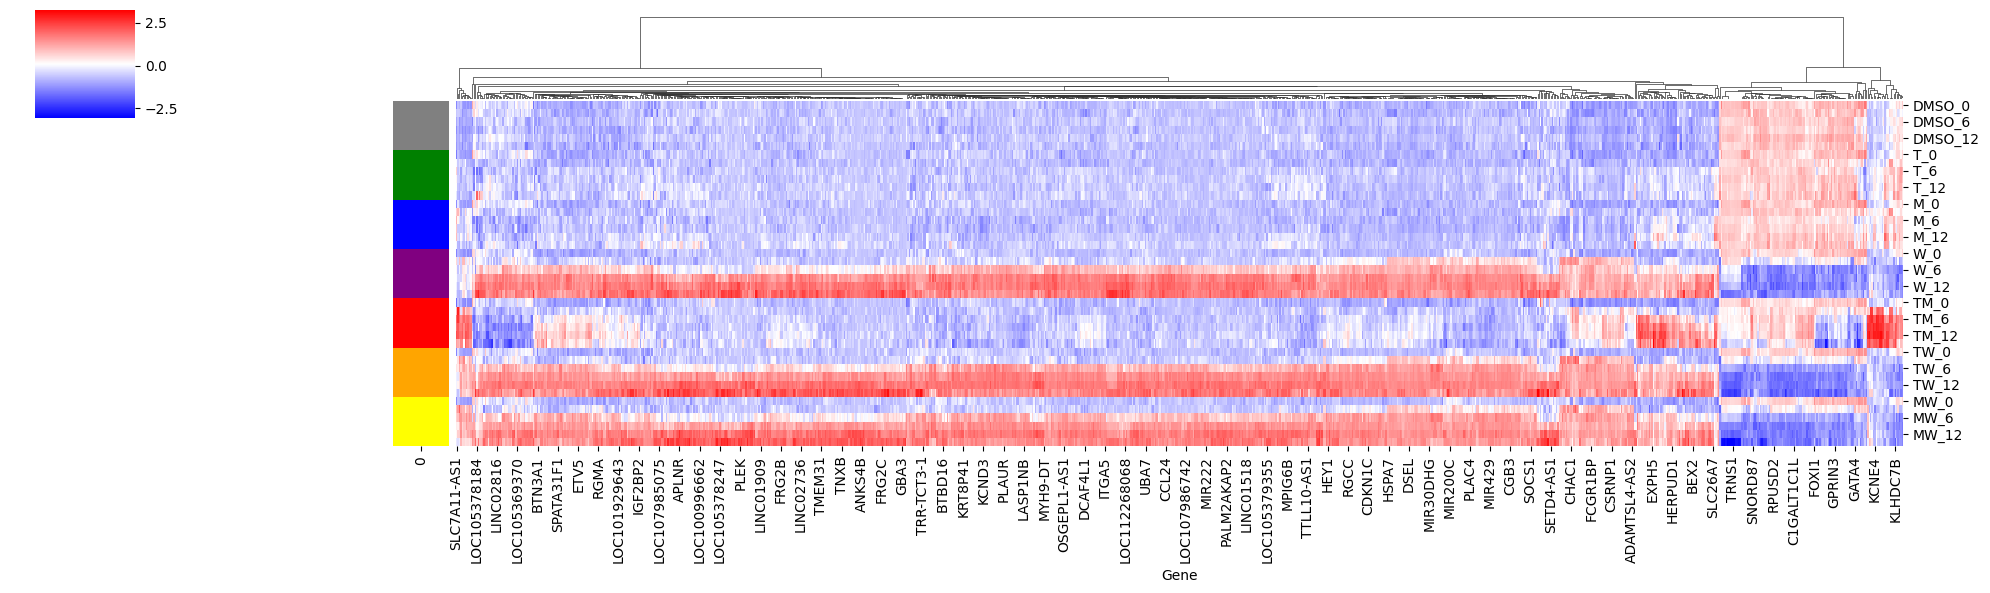

In [ ]:
df1=data_matrix.T
new_treatment_labels=['DMSO_0', 'DMSO_3', 'DMSO_6', 'DMSO_9',
       'DMSO_12', 'DMSO_24', 'T_0', 'T_3', 'T_6',
       'T_9', 'T_12', 'T_24', 'M_0', 'M_3',
       'M_6', 'M_9', 'M_12', 'M_24', 'W_0',
       'W_3', 'W_6', 'W_9', 'W_12', 'W_24',
       'TM_0', 'TM_3', 'TM_6', 'TM_9', 'TM_12',
       'TM_24', 'TW_0', 'TW_3', 'TW_6', 'TW_9',
       'TW_12', 'TW_24', 'MW_0', 'MW_3', 'MW_6',
       'MW_9', 'MW_12', 'MW_24']

# Convert the list of new treatment labels into a pandas series (assuming the same number of samples as the number of treatments)
treatment_series = pd.Series(new_treatment_labels, index=df1.columns[:len(new_treatment_labels)])

# Extract the base treatment (without time) for color mapping
base_treatment = treatment_series.str.extract(r'([A-Za-z]+)')[0]

# Map the base treatments to colors
base_treatment_colors = {
    'DMSO': 'grey', 'M': 'blue', 'T': 'green', 'TM': 'red',
    'W': 'purple', 'TW': 'orange', 'MW': 'yellow', 'TMW': 'pink'
}

# Map base treatments to colors using pandas series
col_colors = base_treatment.map(base_treatment_colors)


df1=df1[['DMSO_0', 'DMSO_3', 'DMSO_6', 'DMSO_9',
       'DMSO_12', 'DMSO_24', 'T_0', 'T_3', 'T_6',
       'T_9', 'T_12', 'T_24', 'M_0', 'M_3',
       'M_6', 'M_9', 'M_12', 'M_24', 'W_0',
       'W_3', 'W_6', 'W_9', 'W_12', 'W_24',
       'TM_0', 'TM_3', 'TM_6', 'TM_9', 'TM_12',
       'TM_24', 'TW_0', 'TW_3', 'TW_6', 'TW_9',
       'TW_12', 'TW_24', 'MW_0', 'MW_3', 'MW_6',
       'MW_9', 'MW_12', 'MW_24']]

sns.clustermap(df1.T, cmap='bwr', row_colors=col_colors, method='average', metric='cosine', z_score=True, standard_scale=None, row_cluster=False, col_cluster=True, figsize=(20, 6),)

plt.show()

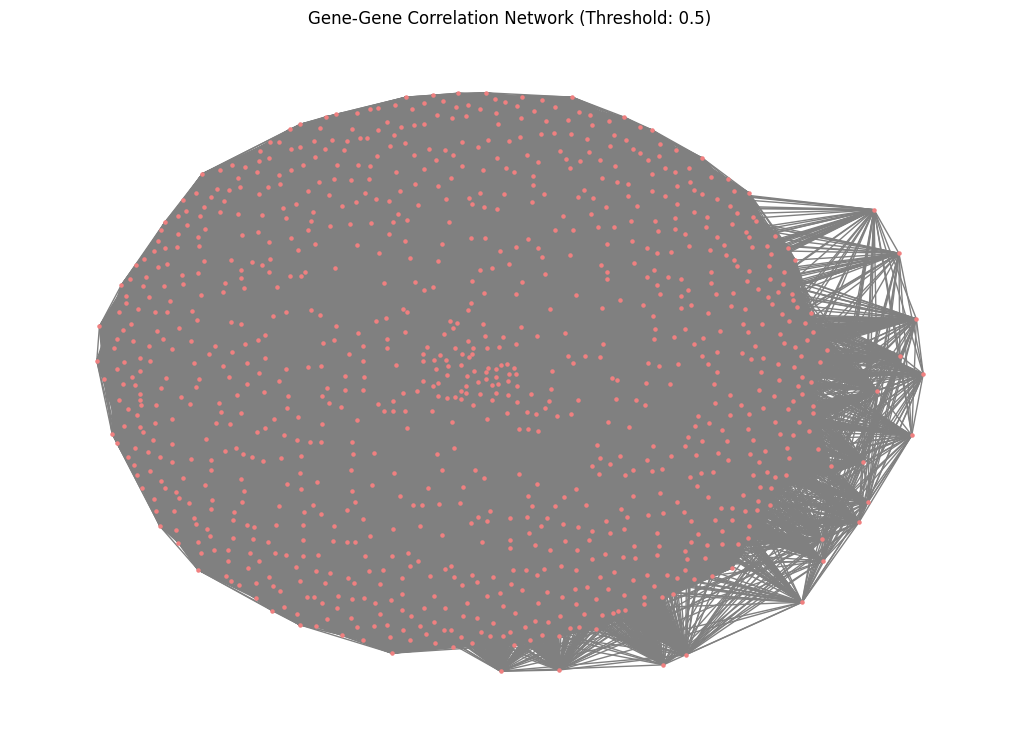

In [ ]:
np.random.seed(42)


data = data_matrix
correlation_matrix = data.corr()

G_samples = nx.Graph()

# Create nodes and edges for the graph
genes = data.columns
G_samples.add_nodes_from(genes)

threshold = 0.5
for gene1 in genes:
    for gene2 in genes.difference([gene1]):
        corr_value = correlation_matrix.loc[gene1, gene2]
        if abs(corr_value) > threshold:
            G_samples.add_edge(gene1, gene2, weight=abs(corr_value))

# Remove isolated nodes and visualize
G_samples.remove_nodes_from(list(nx.isolates(G_samples)))
pos_samples = nx.kamada_kawai_layout(G_samples)

plt.figure(figsize=(10, 7))
nx.draw(G_samples, pos_samples, with_labels=False, node_size=5, node_color='lightcoral', font_size=1, width=1, edge_color='gray')
plt.title(f"Gene-Gene Correlation Network (Threshold: {threshold})")
plt.show()

# Normalize layout positions
layout = pd.DataFrame(pos_samples.values(), index=pos_samples.keys(), columns=['X', 'Y'])
layout -= layout.min()
layout /= layout.max()

In [ ]:
layout.to_csv('layout_MCF7_GSE149428.csv')

In [ ]:
layout

,X,Y
HSPA6,0.667115,0.533129
HSPA7,0.680089,0.527482
ABCB1,0.853352,0.508987
RFPL2,0.883945,0.555836
PGF,0.837200,0.604606
...,...,...
GMFG,0.677595,0.723430
TBX3,0.722766,0.565316
HAP1,0.521517,0.746567
TARS2,0.856888,0.601945


In [ ]:
data_normalized=data_matrix[layout.index]

In [ ]:
from scipy.stats import zscore
import pandas as pd

# Assume df is your DataFrame
data_normalized = data_normalized.apply(zscore, axis=0)


In [ ]:
data_normalized=data_normalized.T


In [ ]:
data_normalized=data_normalized[['DMSO_0', 'DMSO_3', 'DMSO_6', 'DMSO_9',
       'DMSO_12', 'DMSO_24', 'T_0', 'T_3', 'T_6',
       'T_9', 'T_12', 'T_24', 'M_0', 'M_3',
       'M_6', 'M_9', 'M_12', 'M_24', 'W_0',
       'W_3', 'W_6', 'W_9', 'W_12', 'W_24',
       'TM_0', 'TM_3', 'TM_6', 'TM_9', 'TM_12',
       'TM_24', 'TW_0', 'TW_3', 'TW_6', 'TW_9',
       'TW_12', 'TW_24', 'MW_0', 'MW_3', 'MW_6',
       'MW_9', 'MW_12', 'MW_24']]


In [ ]:

outGT = []
outGT_name = []
res = 200
sigma = 0.05

# Create grid
x = np.linspace(0, 1, res)
y = np.linspace(0, 1, res)
x, y = np.meshgrid(x, y)

#df.index=cluster.index

for name in data_normalized:

        data_cluster = data_normalized[name]
        z_total = np.zeros_like(x)
        params = zip(data_cluster, layout['X'], layout['Y'], [sigma]*layout.shape[0])

        with ThreadPoolExecutor() as executor:
            results = executor.map(add_gaussian_to_total, params)
            for z in results:
                z_total += z

        mat = z_total.reshape(1, -1)
        outGT.append(mat)
        outGT_name.append(name)

        #plt.figure()
        #plt.imshow(mat.reshape(res, res), origin='lower', cmap='jet', vmin=-10, vmax=10)
        #plt.colorbar()
        #plt.title(name)
        #plt.savefig(f'plot1/{name}.png', bbox_inches='tight')
        #plt.close()


outGT = np.reshape(outGT, (len(outGT), -1))


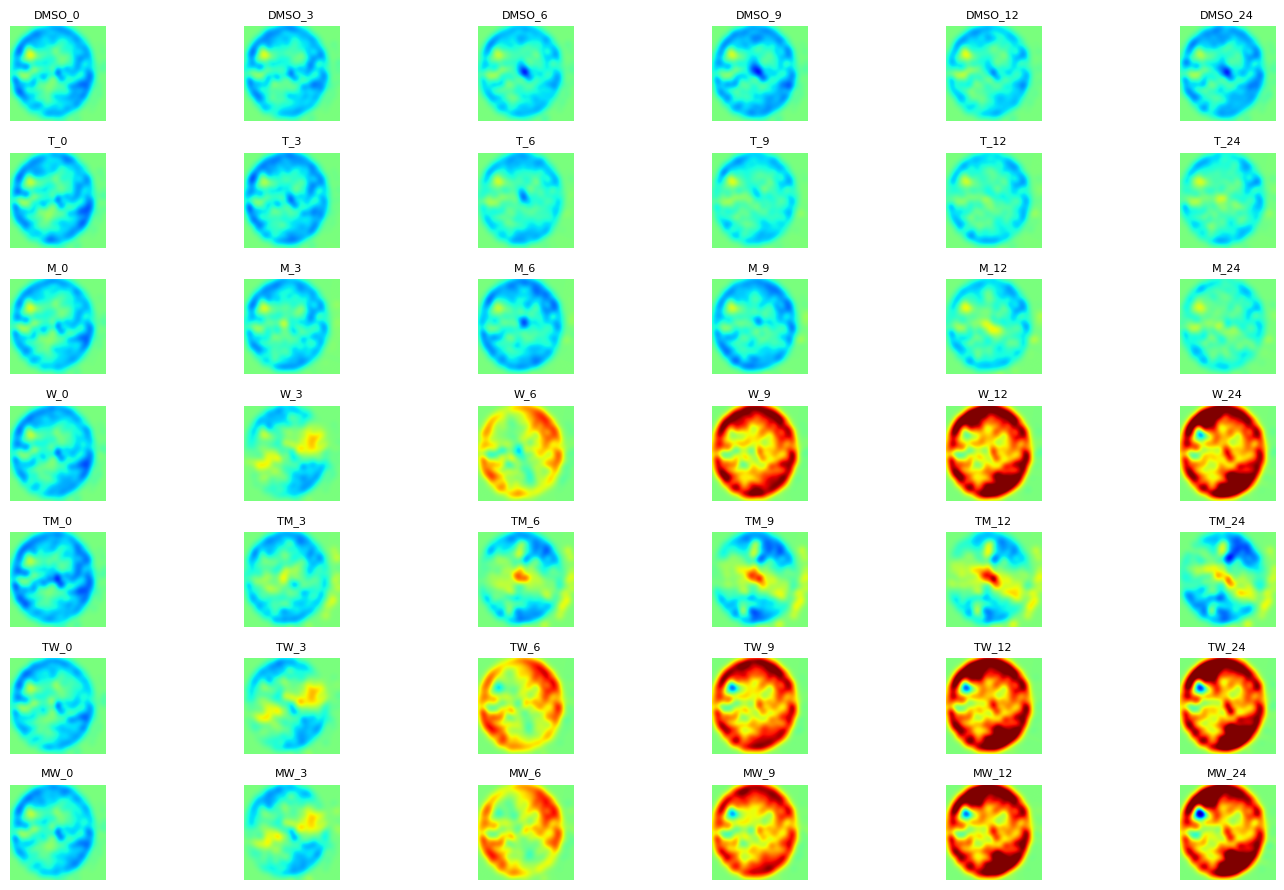

In [ ]:
import matplotlib.pyplot as plt



# Create a figure and a set of subplots with 8 rows and 6 columns.
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(15, 9))

# Define some titles for each subplot
titles = data_normalized.columns

# Define a unique colormap for each image
colormaps = 48 * ['jet']

# Iterate over each subplot, image matrix, title, and colormap to display them.
for i, (ax, title, colormap) in enumerate(zip(axes.flat, titles, colormaps)):
    mat = outGT[i, :]
    image_matrices = mat.reshape(res, res)
    im = ax.imshow(image_matrices, origin='lower', cmap='jet', vmin=-20, vmax=20)
    ax.set_title(title, fontsize=8)
    ax.axis('off')



# Adjust subplot spacing to ensure figures are attached together
#plt.subplots_adjust(bottom=0.15, wspace=-1)  # No space between subplots

plt.tight_layout()
plt.show()


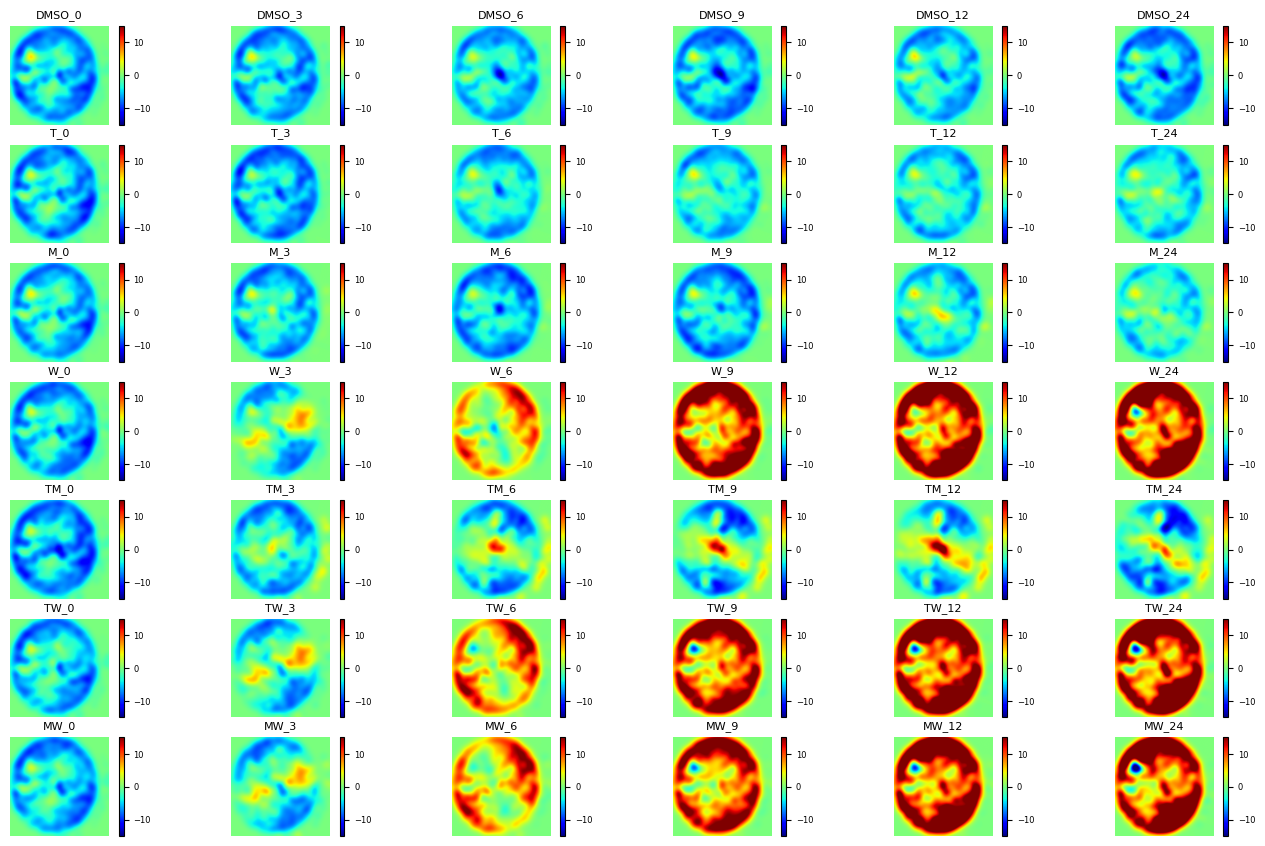

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl



# Create a figure and a set of subplots with 8 rows and 6 columns, specifying margins
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(15, 9),
                         subplotpars=mpl.figure.SubplotParams(left=0.05, right=0.95, bottom=0.05, top=0.95,
                                                              wspace=-.1, hspace=0.2))

# Define some titles for each subplot
titles = data_normalized.columns

# Define a unique colormap for each image
colormaps = 48 * ['jet']

# Iterate over each subplot, image matrix, title, and colormap to display them.
for i, (ax, title, colormap) in enumerate(zip(axes.flat, titles, colormaps)):
    mat = outGT[i, :]
    image_matrices = mat.reshape(res, res)
    im = ax.imshow(image_matrices, origin='lower', cmap='jet', vmin=-15, vmax=15)
    ax.set_title(title, fontsize=8)
    ax.axis('off')
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.yaxis.label.set_size(8)
    cbar.ax.tick_params(labelsize=6)

plt.show()